### Sections

* [1. Identify columns that contain a single value](#section1)
    - 1.1 Remove column(s) with a single unique value
* [2. Identify columns that contain very few unique values](#section2)
    - 2.1 Remove column(s) that have unique values less than 1% the number of values
* [3. Identify columns that have a low variance](#section3)
    - 3.1 Plotting the relationship between the threshold & the number of features in the transformed dataset
    - 3.2 Remove columns that have a low variance
* [4. Identify rows that contain duplicate data](#section4)
    - 4.1 Delete rows that contain duplicate data
    - 4.2 Visualisation

### Libraries

- Pandas
- NumPy
- scikit-learn

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Import custom functions module
import dataCleaningModule as mod

In [2]:
# Load data to return an ndarray
data = mod.loadFile('data/oil-spill.csv')
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(937, 50)


In [3]:
# Load data to return a pandas DataFrame
df = pd.read_csv('data/oil-spill.csv', header=None)
print(df.shape)
display(df.head())

(937, 50)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


### 1. Identify columns that contain a single value<a class="anchor" id="section1"></a>
- data: ndarray
- df: pandas DataFrame

In [4]:
# Return all columns with & a count of their unique values
mod.colValTotal(data)

{0: 238} {1: 297} {2: 927} {3: 933} {4: 179} {5: 375} {6: 820} {7: 618} {8: 561} {9: 57} {10: 577} {11: 59} {12: 73} {13: 107} {14: 53} {15: 91} {16: 893} {17: 810} {18: 170} {19: 53} {20: 68} {21: 9} {22: 1} {23: 92} {24: 9} {25: 8} {26: 9} {27: 308} {28: 447} {29: 392} {30: 107} {31: 42} {32: 4} {33: 45} {34: 141} {35: 110} {36: 3} {37: 758} {38: 9} {39: 9} {40: 388} {41: 220} {42: 644} {43: 649} {44: 499} {45: 2} {46: 937} {47: 169} {48: 286} {49: 2} 

In [5]:
# Return all columns with a unique value count of less than 5
mod.colValTotalLow(data)

# Quick view of these columns
display(df.iloc[:, [22, 32, 36, 45, 49]].head(10))

{22: 1} {32: 4} {36: 3} {45: 2} {49: 2} 

,22,32,36,45,49
0,0,0.0,0.00,0,1
1,0,0.0,0.00,0,0
2,0,0.0,0.01,1,1
3,0,0.0,0.00,1,1
4,0,0.0,0.00,0,0
5,0,0.0,0.01,0,1
6,0,0.0,0.01,0,1
7,0,0.0,0.01,0,0
8,0,0.0,0.01,0,1
9,0,0.0,0.01,0,1


In [6]:
# Count number of unique values in DataFrame
column_values = df.nunique()

# List comprehension to identify columns (by index number) with a unique value count less than 5
print([i for (i,v) in enumerate(column_values) if v <= 5])

[22, 32, 36, 45, 49]


#### 1.1 Remove column(s) with a single unique value

In [7]:
# List comprehension to identify column(s) (by index number) with a unique value count equal to 1
print(f"Column with only one unique value: {[i for (i,v) in enumerate(column_values) if v == 1]}")

# Save index number to varaible to_delete
to_delete = [i for (i,v) in enumerate(column_values) if v == 1]
print(f"Column index: {to_delete}")

# Drop/Remove column from DataFrame
new_df = df.drop(to_delete, axis=1).copy()

# New shape
print(new_df.shape)

Column with only one unique value: [22]
Column index: [22]
(937, 49)


### 2. Identify columns that contain very few unique values<a class="anchor" id="section2"></a>
- **data**: ndarray
- **df**: pandas DataFrame

In [8]:
# Return all columns with a count of unique values & percentage of column that is unique
mod.colValPercentages(data)

{0: 238, 25.4%} {1: 297, 31.7%} {2: 927, 98.9%} {3: 933, 99.6%} {4: 179, 19.1%} {5: 375, 40.0%} {6: 820, 87.5%} {7: 618, 66.0%} {8: 561, 59.9%} {9: 57, 6.1%} {10: 577, 61.6%} {11: 59, 6.3%} {12: 73, 7.8%} {13: 107, 11.4%} {14: 53, 5.7%} {15: 91, 9.7%} {16: 893, 95.3%} {17: 810, 86.4%} {18: 170, 18.1%} {19: 53, 5.7%} {20: 68, 7.3%} {21: 9, 1.0%} {22: 1, 0.1%} {23: 92, 9.8%} {24: 9, 1.0%} {25: 8, 0.9%} {26: 9, 1.0%} {27: 308, 32.9%} {28: 447, 47.7%} {29: 392, 41.8%} {30: 107, 11.4%} {31: 42, 4.5%} {32: 4, 0.4%} {33: 45, 4.8%} {34: 141, 15.0%} {35: 110, 11.7%} {36: 3, 0.3%} {37: 758, 80.9%} {38: 9, 1.0%} {39: 9, 1.0%} {40: 388, 41.4%} {41: 220, 23.5%} {42: 644, 68.7%} {43: 649, 69.3%} {44: 499, 53.3%} {45: 2, 0.2%} {46: 937, 100.0%} {47: 169, 18.0%} {48: 286, 30.5%} {49: 2, 0.2%} 

In [9]:
# Return all columns that have unique values that are less than 5% of the number of values
mod.colValPercentagesLow(data)

{21: 1.0%}
{22: 0.1%}
{24: 1.0%}
{25: 0.9%}
{26: 1.0%}
{31: 4.5%}
{32: 0.4%}
{33: 4.8%}
{36: 0.3%}
{38: 1.0%}
{39: 1.0%}
{45: 0.2%}
{49: 0.2%}


In [10]:
# Count number of unique values in DataFrame
column_values = df.nunique()

# List comprehension to identify column(s) (by index number) with a unique value count equal to 5
print(f"Columns: {[i for (i,v) in enumerate(column_values) if (float(v)/df.shape[0]*100) <=5.0]}")

Columns: [21, 22, 24, 25, 26, 31, 32, 33, 36, 38, 39, 45, 49]


#### 2.1 Remove column(s) that have unique values less than 1% the number of values

In [11]:
# List comprehension to identify column(s) (by index number) with a unique value count equal to 1
print([i for (i,v) in enumerate(column_values) if (float(v)/df.shape[0]*100) <=1.0])

to_delete = [i for (i,v) in enumerate(column_values) if (float(v)/df.shape[0]*100) <=1.0]
print(f"Column index: {to_delete}")

new_df2 = df.drop(to_delete, axis=1).copy()

print(new_df2.shape)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
Column index: [21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


### 3. Identify columns that have a low variance<a class="anchor" id="section3"></a>
- VarianceThreshold

In [12]:
# Return a NumPy representation of a pandas DataFrame
display(df.values)

# Save to variable 'data'
data = df.values

# Split array into inputs(X) & output(y)
X = data[:, :-1]
y = data[:, -1]

print(f"Input Shape: {X.shape} Output Shape: {y.shape}")

# Define the transform
transform = VarianceThreshold()

# Transform the input data - apply the transform to remove all columns with a variance of 0.0
X_sel = transform.fit_transform(X)

print(f"X_sel dtype: {type(X_sel)}")
print(X_sel.shape)

array([[1.00000e+00, 2.55800e+03, 1.50609e+03, ..., 6.57400e+01,
        7.95000e+00, 1.00000e+00],
       [2.00000e+00, 2.23250e+04, 7.91100e+01, ..., 6.57300e+01,
        6.26000e+00, 0.00000e+00],
       [3.00000e+00, 1.15000e+02, 1.44985e+03, ..., 6.58100e+01,
        7.84000e+00, 1.00000e+00],
       ...,
       [2.02000e+02, 1.40000e+01, 2.51400e+01, ..., 6.59100e+01,
        6.12000e+00, 0.00000e+00],
       [2.03000e+02, 1.00000e+01, 9.60000e+01, ..., 6.59700e+01,
        6.32000e+00, 0.00000e+00],
       [2.04000e+02, 1.10000e+01, 7.73000e+00, ..., 6.56500e+01,
        6.26000e+00, 0.00000e+00]])

Input Shape: (937, 49) Output Shape: (937,)
X_sel dtype: <class 'numpy.ndarray'>
(937, 48)


In [13]:
# A list to plot the number of features (need to call function below)
number_of_features = list()

# Apply transform with each threshold from 0.0 to 0.5 with a step size of 0.05
mod.varianceTransform(df, X, number_of_features)

# Print the number of features for each given threshold (as the threshold increases)
print('\n'+str(number_of_features))

> Threshold=0.00, Number of features=48
> Threshold=0.05, Number of features=37
> Threshold=0.10, Number of features=36
> Threshold=0.15, Number of features=35
> Threshold=0.20, Number of features=35
> Threshold=0.25, Number of features=35
> Threshold=0.30, Number of features=35
> Threshold=0.35, Number of features=35
> Threshold=0.40, Number of features=35
> Threshold=0.45, Number of features=33
> Threshold=0.50, Number of features=31

[48, 37, 36, 35, 35, 35, 35, 35, 35, 33, 31]


#### 3.1 Plotting the relationship between the threshold & the number of features in the transformed dataset

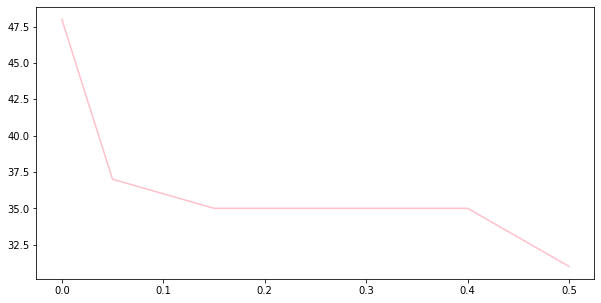

In [14]:
# For plot generation
from matplotlib import pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 5))

# Thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)

# Plot y (the number of features) versus x (the thresholds)
plt.plot(thresholds, number_of_features, color='pink') # (x, y)

# Displays open figure
plt.show()

#### 3.2 Remove columns that have a low variance

In [15]:
# Return a NumPy representation of a pandas DataFrame
data = df.values

# Split DataFrame inputs (X) & outputs (y)
X = data[:, :-1]
y = data[:, -1]

# Thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)

for t in thresholds:
    # Define the transform
    transform = VarianceThreshold(threshold=t)
    # Applies the transform to DataFrame
    data_transformed = transform.fit_transform(X)
    # Stores the transformation in a pandas DataFrame
    new_dataframe = pd.DataFrame(data_transformed)
    
print(f"Original DataFrame shape: {data.shape}")    
print(f"New DataFrame shape: {new_dataframe.shape}")    

Original DataFrame shape: (937, 50)
New DataFrame shape: (937, 31)


### 4. Identify rows that contain duplicate data<a class="anchor" id="section4"></a>

In [16]:
# pandas DataFrame
df = pd.read_csv('data/iris.csv', header=None)

# View number of duplicated rows in DataFrame (True: duplicate)
print(df.duplicated().value_counts())

False    147
True       3
dtype: int64


In [17]:
# View the duplicate rows in DataFrame
display(df.loc[df.duplicated()])

# View the duplicate rows in DataFrame including first occurrence(s)
display(df.loc[df.duplicated(keep=False)])

,0,1,2,3,4
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


,0,1,2,3,4
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


#### 4.1 Delete rows that contain duplicate data

In [18]:
# Remove duplicate rows from DataFrame
clean_data_frame=df.drop_duplicates()

print(f"Original DataFrame shape: {df.shape}")    
print(f"New DataFrame shape: {clean_data_frame.shape}") 

Original DataFrame shape: (150, 5)
New DataFrame shape: (147, 5)


#### For Visualisation

- To view duplicates in DataFrame (does not include first occurrence).

In [19]:
display(mod.duplicateRows(df))

,0,1,2,3,4
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa
5,5.400000,3.900000,1.700000,0.400000,Iris-setosa
6,4.600000,3.400000,1.400000,0.300000,Iris-setosa
7,5.000000,3.400000,1.500000,0.200000,Iris-setosa
8,4.400000,2.900000,1.400000,0.200000,Iris-setosa
9,4.900000,3.100000,1.500000,0.100000,Iris-setosa
